# Исследование рынка заведений общественного питания Москвы

- Автор: Андрей Подшивалов
- Дата: 24.02.2025

### Цель проекта
Проведение исследовательского анализ данных рынка общественного питания города Москвы для определения наиболее релевантного потенциального заведения для Заказчика.
### Задачи проекта
1. **Познакомиться с данными**, изучить их общую информацию, проверить соответствие описанию, наличие пропущенных значений и использование верных типов данных  


2. **Объединить данные в один датафрейм**
  
  
3. **Подготовить данные к исследовательскому анализу:** 
 * преобразовать типы данных;
 * обработать пропущенные значения; 
 * проверить данные на дубликаты; 
 * создать новые столбцы
  
  
4. **Провести исследовательский анализ данных:**
 * ответить на вопросы о категориях заведений, административных районах, сетевых и несетевых заведениях;
 * исследовать соотношение посадочных мест, рейтинги заведений, корреляцию рейтингов с разными данными;
 * сгруппировать данные по названиям, изучить вариацию среднего чека в зависимости от района Москвы.
  
  
5. **Обобщить результаты исследовательского анализа данных**, сформулировать итоговый вывод и рекомендации для заказчика

### Описание данных

Файл **/datasets/rest_info.csv** содержит информацию о заведениях общественного питания:
* `name` — название заведения;
* `address` — адрес заведения;
* `district` — административный район, в котором находится заведение, например Центральный административный округ;
* `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* `hours` — информация о днях и часах работы;
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    * 0 — заведение не является сетевым;
    * 1 — заведение является сетевым.
* `seats` — количество посадочных мест.  
  
Файл **/datasets/rest_price.csv** содержит информацию о среднем чеке в заведениях общественного питания:
* `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    * «Средний счёт: 1000–1500 ₽»;
    * «Цена чашки капучино: 130–220 ₽»;
    * «Цена бокала пива: 400–600 ₽» и так далее;
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
* `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

Шаг 1. Загрузка данных и знакомство с ними  
Шаг 2. Предобработка данных  
Шаг 3. Исследовательский анализ данных  
Шаг 4. Итоговый вывод и рекомендации  

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from phik import phik_matrix

In [4]:
info = pd.read_csv('/datasets/rest_info.csv')
df_info = pd.DataFrame(info)
df_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
price = pd.read_csv('/datasets/rest_price.csv')
df_price = pd.DataFrame(price)
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [7]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


---

### Промежуточный вывод
* В таблице **info** присутствуют пропуски в столбцах **hours** и **seats**.
* Таблица **price** также имеет пропуски в категории цен (столбец **price**), не везде отмечен средний чек **avg_bill**, **middle_avg_bill** и **middle_coffee_cup**.  
* Также количество **id** в таблицах **info** и **price** не совпадает.

### Подготовка единого датафрейма

In [8]:
df = pd.merge(df_info, df_price, on = 'id', how = 'left')

In [9]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных

Столбец seats следует привести к типу int. В остальных столбцах типы данных верны.
Чтобы избежать ошибок, заполним пропуски в столбце seats условным значением -1 для заведений, информации по кол-ву мест в которых нет.

In [11]:
df['seats'] = df['seats'].fillna(-1)
df['seats'] = df['seats'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              8406 non-null   int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 919.4+ KB


### Пропущенные значения в данных

In [13]:
# Кол-во пропусков абсолютных значениях:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [14]:
# Кол-во пропусков в относительных значениях:
share = df.isna().sum()/df.shape[0]
share.sort_values(ascending=False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
seats                0.000000
dtype: float64

* Больше всего пропусков в столбце **middle_coffee_cup**, **middle_avg_bill**, **price** и **avg_bill**.
* В **middle_coffee_cup**, **middle_avg_bill**, чтобы не искажать распределение, стоит заменить значения нулем;
* В столбцах **price** и **avg_bill** стоит заменить пропуски на значение 'unknown';  
* В столбце hours кол-во пропусков хоть и незначительно, лучше всё равно заменить их на 'unknown'.

In [15]:
df['middle_coffee_cup'] = df['middle_coffee_cup'].fillna(0)
df['middle_avg_bill'] = df['middle_avg_bill'].fillna(0)
df['price'] = df['price'].fillna('unknown')
df['avg_bill'] = df['avg_bill'].fillna('unknown')
df['hours'] = df['hours'].fillna('unknown')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              8406 non-null   int64  
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    8406 non-null   float64
 12  middle_coffee_cup  8406 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 919.4+ KB


### Дубликаты

In [17]:
df.duplicated().sum()

0

In [18]:
#Чтобы избежать неявных дубликатов, приведем значения всех строк к нижнему регистру
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()

In [19]:
df.duplicated(subset = ['name', 'address', 'district']).sum()

4

In [20]:
#Удаляем дубликаты
df = df.drop_duplicates(subset = ['name', 'address', 'district'], keep='first')

In [21]:
#Перепроверяем их наличие
df.duplicated(subset = ['name', 'address', 'district']).sum()

0

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7: 
    - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
    - логическое значение `False` — в противоположном случае.

In [22]:
keys = ['ежедневно', 'круглосуточно']
df['hours'][df['hours'].str.contains('|'.join(keys))].unique()

array(['ежедневно, 10:00–22:00', 'ежедневно, 09:00–22:00',
       'ежедневно, 10:00–23:00', 'ежедневно, 12:00–00:00',
       'ежедневно, круглосуточно', 'ежедневно, 10:00–21:00',
       'ежедневно, 08:00–22:00', 'ежедневно, 13:00–00:00',
       'ежедневно, 09:00–21:00', 'ежедневно, 10:00–19:00',
       'ежедневно, 08:00–21:00', 'ежедневно, 09:00–23:00',
       'ежедневно, 08:00–23:00', 'ежедневно, 11:00–00:00',
       'ежедневно, 09:00–02:00', 'ежедневно, 12:00–23:00',
       'ежедневно, 12:00–03:00', 'ежедневно, 16:00–06:00',
       'ежедневно, 09:00–01:00', 'ежедневно, 11:00–23:00',
       'ежедневно, 09:00–06:00', 'ежедневно, 10:00–21:30',
       'ежедневно, 08:00–00:00', 'ежедневно, 06:00–20:00',
       'ежедневно, 10:00–20:00', 'ежедневно, 11:00–22:00',
       'ежедневно, 10:30–23:00', 'ежедневно, 07:00–00:00',
       'ежедневно, 10:00–22:00, перерыв 16:00–16:20',
       'ежедневно, 13:00–04:00', 'ежедневно, 11:00–19:00',
       'ежедневно, 16:00–04:00', 'ежедневно, 09:00–00:00',


In [23]:
# Добавляем с помощью цикла заведения, которые работают каждый день недели 24 часа.
is_24_7 = []
for i in df['hours']:
    if (i == 'ежедневно, круглосуточно') | (i == 'круглосуточно, ежедневно'):
        is_24_7.append(True)
    else:
        is_24_7.append(False)

In [24]:
df['is_24_7'] = pd.Series(is_24_7)

In [25]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,unknown,unknown,0.0,0.0,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,0.0,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,0.0,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,unknown,Цена чашки капучино:155–185 ₽,0.0,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,0.0,False


In [26]:
krug = df['is_24_7'].sum()
display(f'Всего круглосуточных и ежедневно работающих заведений: {krug}')

'Всего круглосуточных и ежедневно работающих заведений: 729'

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

Были заполнены пропуски в столбцах **middle_coffee_cup**, **middle_avg_bill**, условным значением -1;
В столбцах **price** **avg_bill** и **hours** пропуски заменены на значение 'unknown';

Также удалено 4 неявных дубликата. Явных дубликатов обнаружено не было.

Создан столбец **is_24_7**, содержащий данные, является ли заведение круглосуточным и ежедневно работающим.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Нужно исследовать количество объектов общественного питания по каждой категории.

In [27]:
df['category'].unique().tolist()

['кафе',
 'ресторан',
 'кофейня',
 'пиццерия',
 'бар,паб',
 'быстрое питание',
 'булочная',
 'столовая']

In [28]:
df.groupby('category')['id'].agg('count')

category
бар,паб             764
булочная            256
быстрое питание     603
кафе               2376
кофейня            1413
пиццерия            633
ресторан           2042
столовая            315
Name: id, dtype: int64

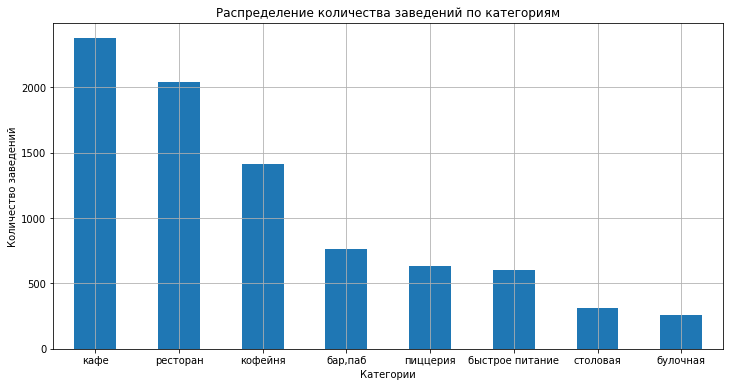

In [29]:
plt.figure(figsize=(12, 6))

df['category'].value_counts().plot(
               kind='bar', 
               rot=0, 
               legend=False,
               title='Распределение количества заведений по категориям')
plt.xlabel('Категории')
plt.ylabel('Количество заведений')
plt.grid()

plt.show()

Распределение показывает, что наиболее популярная категория заведений - кафе, далее идут ресторан и кофейня.

---

### Задача 2
Исследование распределения количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [30]:
df['district'].unique().tolist()

['Северный административный округ',
 'Северо-Восточный административный округ',
 'Северо-Западный административный округ',
 'Западный административный округ',
 'Центральный административный округ',
 'Восточный административный округ',
 'Юго-Восточный административный округ',
 'Южный административный округ',
 'Юго-Западный административный округ']

In [31]:
df.groupby('district')['id'].agg('count')

district
Восточный административный округ            798
Западный административный округ             850
Северный административный округ             898
Северо-Восточный административный округ     890
Северо-Западный административный округ      409
Центральный административный округ         2242
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Южный административный округ                892
Name: id, dtype: int64

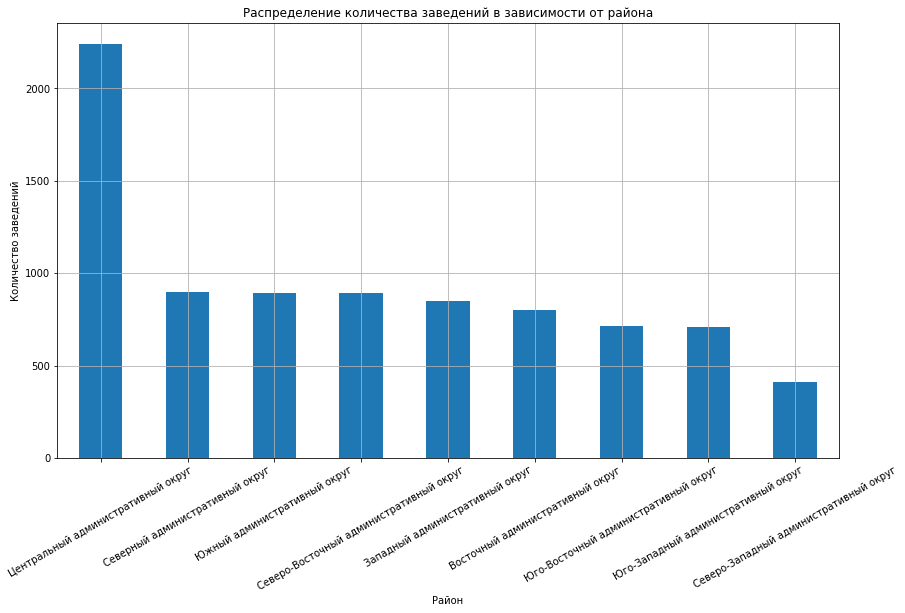

In [32]:
plt.figure(figsize=(14, 8))

df['district'].value_counts().plot(
               kind='bar', 
               rot=30, 
               legend=False,
               title='Распределение количества заведений в зависимости от района')
plt.xlabel('Район')
plt.ylabel('Количество заведений')
plt.grid()

plt.show()

Судя по распределению, Центральный административный округ - наиболее популярный район. Наименее популярный - Северо-Западный.

In [33]:
#Посчитаем отдельно распределение для ЦАО
df[df['district']=='Центральный административный округ'].groupby('category')['id'].agg('count')

category
бар,паб            364
булочная            50
быстрое питание     87
кафе               464
кофейня            428
пиццерия           113
ресторан           670
столовая            66
Name: id, dtype: int64

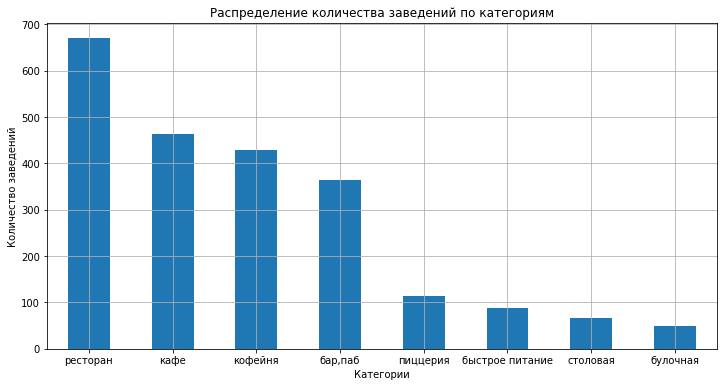

In [34]:
plt.figure(figsize=(12, 6))

df[df['district']=='Центральный административный округ']['category'].value_counts().plot(
               kind='bar', 
               rot=0, 
               legend=False,
               title='Распределение количества заведений по категориям')
plt.xlabel('Категории')
plt.ylabel('Количество заведений')
plt.grid()

plt.show()

В ЦАО, в отличие от общего распределения по Москве, наиболее популярной категорией заведения выходит ресторан, а кафе занимает второе место.

---

### Задача 3
Теперь стоит посмотреть соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Ответим на вопросы. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? 

In [35]:
df.groupby('chain')['id'].agg('count')/df.shape[0]

chain
0    0.618781
1    0.381219
Name: id, dtype: float64

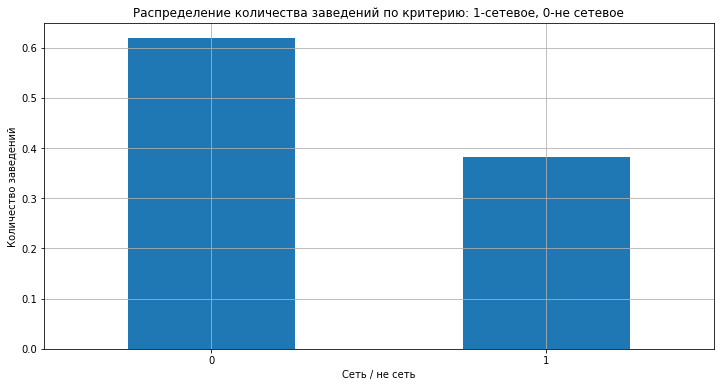

In [36]:
plt.figure(figsize=(12, 6))

(df['chain'].value_counts()/df.shape[0]).plot(
               kind='bar', 
               rot=0,
               xlabel='Сеть / не сеть',
               ylabel='Количество заведений',
               legend=False,
               title='Распределение количества заведений по критерию: 1-сетевое, 0-не сетевое')

plt.grid()

plt.show()

График показывает, что сетевых заведений более чем в 1.5 раза меньше, чем не сетевых, если подсчитывать доли в общих значениях. Теперь стоит проверить распределение в разрезе категорий заведения.

In [37]:
grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
#Чтобы вычислить доли, напишем цикл for
for col in [0, 1]:
    grouped[f'share_{col}'] = round(grouped[col]/grouped[[0, 1]].sum(axis = 1) * 100, 2)
display(grouped.sort_values(by=[0, 1], ascending=False))

chain,0,1,share_0,share_1
category,,,,
кафе,1597,779,67.21,32.79
ресторан,1313,729,64.30,35.70
кофейня,693,720,49.04,50.96
"бар,паб",596,168,78.01,21.99
быстрое питание,371,232,61.53,38.47
пиццерия,303,330,47.87,52.13
столовая,227,88,72.06,27.94
булочная,99,157,38.67,61.33


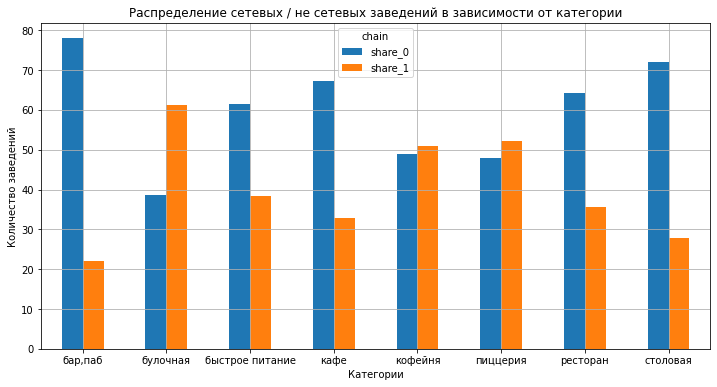

In [38]:
grouped[['share_0', 'share_1']].plot(kind='bar',
               title='Распределение сетевых / не сетевых заведений в зависимости от категории',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категории',
               rot=0,
               figsize=(12, 6))
plt.grid()

plt.show()

В разрезе категорий стоит отметить, что сетевых булочных, пиццерий и кофеен больше, чем не сетевых.  
Однако в других категориях не сетевых заведений зачастую в полтора, два и более раз больше: кафе, рестораны, столовые, бары/пабы.

---

### Задача 4

Теперь исследуем количество посадочных мест в заведениях. Стоит понять, встречаются ли в данных аномальные значения или выбросы. И если да, то с чем они могут быть связаны? 


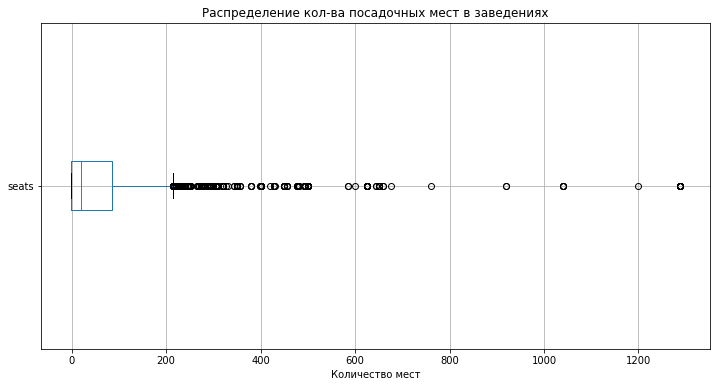

In [39]:
#Построим диаграмму размаха
plt.figure(figsize=(12, 6))

df.boxplot(column='seats', vert=False)
plt.title('Распределение кол-ва посадочных мест в заведениях')
plt.xlabel('Количество мест')

plt.show()

Аномальные значения присутствуют от 200 до значений, равных более чем 1200;  
Можно предположить, что данные были неправильно заполнены, например, в части данных были добавлены лишние нули;  
Выведем наиболее типичное количество посадочных мест для каждой категории заведений. При этом отфильтруем условное значение -1, которым ранее обозначили пустые строки.

In [40]:
seats_by_cat = df[df['seats'] != -1].groupby('category')['seats'].apply(pd.Series.mode).reset_index(level=1, drop=True)
display(seats_by_cat)

category
бар,паб             60
булочная             0
быстрое питание      0
кафе                40
кофейня            100
пиццерия            40
ресторан           100
столовая            40
Name: seats, dtype: int64

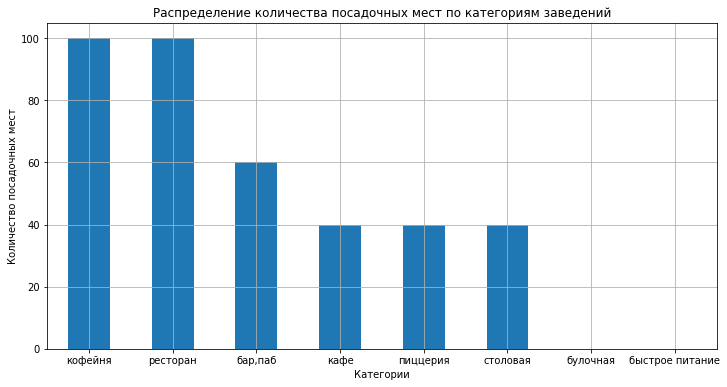

In [41]:
plt.figure(figsize=(12, 6))

seats_by_cat.sort_values(ascending=False).plot(
               kind='bar', 
               rot=0,
               xlabel='Категории',
               ylabel='Количество посадочных мест',
               legend=False,
               title='Распределение количества посадочных мест по категориям заведений')

plt.grid()

plt.show()

Из распределения понятно, что существуют заведения, в которых посадочные места в принципе не предусмотрены: булочная и быстрое питание;  
Также видно, что в кафе, пиццериях и столовых наиболее распространенное количество мест - 40;  
В распределении выделяются кофейня и ресторан: модальные значения кол-ва посадочных мест в них равны 100.

---

### Задача 5

Теперь надо посмотреть рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений. Попробуем выяснить, сильно ли различаются усреднённые рейтинги для разных типов общепита.

In [42]:
# Посчитаем средний рейтинг для каждой категории общепита
rat_by_cat = df.groupby('category')['rating'].mean()

In [43]:
display(rat_by_cat)

category
бар,паб            4.387696
булочная           4.268359
быстрое питание    4.050249
кафе               4.124285
кофейня            4.277282
пиццерия           4.301264
ресторан           4.290402
столовая           4.211429
Name: rating, dtype: float64

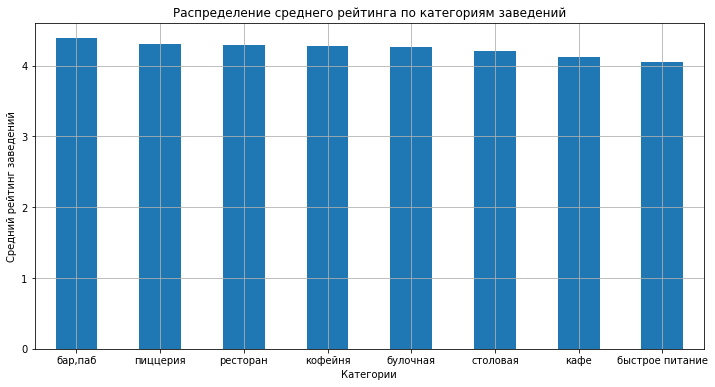

In [44]:
plt.figure(figsize=(12, 6))

rat_by_cat.sort_values(ascending=False).plot(
               kind='bar', 
               rot=0,
               xlabel='Категории',
               ylabel='Средний рейтинг заведений',
               legend=False,
               title='Распределение среднего рейтинга по категориям заведений')

plt.grid()

plt.show()

Исходя из полученного распределения, средний рейтинг у баров/пабов самый высокий - 4.38.  
Однако стоит отметить, что разброс данных небольшой - средний рейтинг для всех категорий заведений по Москве не ниже 4 баллов.

---

### Задача 6

Нужно понять, с какими данными показывают самую сильную корреляцию рейтинги заведений. Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным.

In [45]:
# Отфильтруем значения цен unknown, чтобы не искажать корреляцию
filt_df = df[df['price'] != 'unknown']
corr_matrix = filt_df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

interval columns not set, guessing: ['chain', 'seats', 'rating']


In [46]:
display('Корреляционная матрица рейтинга заведений с другими столбцами')
corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

'Корреляционная матрица рейтинга заведений с другими столбцами'

,rating
price,0.220295
district,0.193529
category,0.173015
chain,0.113498
is_24_7,0.032987
seats,0.000000


Наибольшая корреляция присутствует между ценой и рейтингом и равна 0.22, то есть входит в диапазон от 0 до 0.3 => связь прямая слабая.

**Анализ взаимосвязи**  
  
  Попробуем выяснить, существует ли зависимость между категорией цен в заведении и его рейтингом.

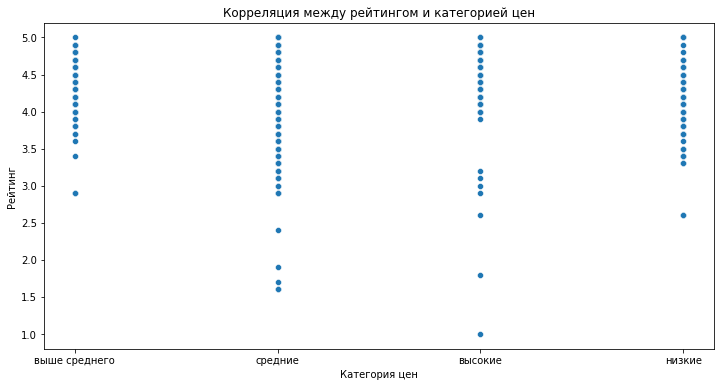

In [47]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='rating', data=filt_df)

plt.title('Корреляция между рейтингом и категорией цен')
plt.ylabel('Рейтинг')
plt.xlabel('Категория цен')

plt.show()

Исходя из распределения по категориям цен / рейтингу, можно сделать вывод, что в заведениях ценами выше среднего и низкими ценами оценки в среднем более высокие, чем в других категориях.  
Разброс оценок значительно больше в заведениях со средними и высокими ценами. Кроме того в категории "высокие" распределение имеет даже единицы.

---

### Задача 7

Сгруппируем данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. Надо выяснить, к какой категории заведений они относятся.

In [48]:
chains = df.loc[df['chain'] == 1]
top_15 = round(chains.groupby(
    ['name','category']
)[['id', 'rating']].agg(
    {'id':'count', 'rating':'mean'}
).sort_values(by='id', ascending = False).head(15)
               , 2)
display(top_15)

,,id,rating
name,category,,
шоколадница,кофейня,119,4.18
домино'с пицца,пиццерия,76,4.17
додо пицца,пиццерия,74,4.29
one price coffee,кофейня,71,4.06
яндекс лавка,ресторан,69,3.87
cofix,кофейня,65,4.08
prime,ресторан,49,4.11
кофепорт,кофейня,42,4.15
кулинарная лавка братьев караваевых,кафе,39,4.39


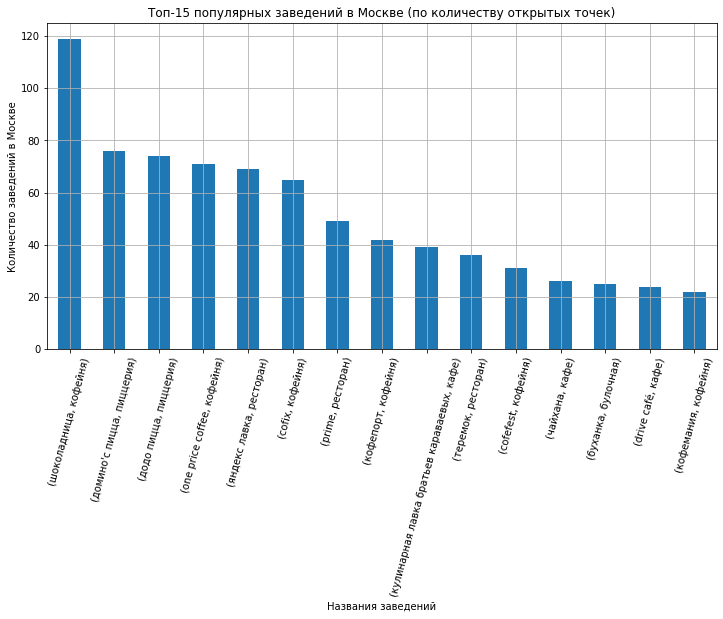

In [49]:
plt.figure(figsize=(12,6))
top_15['id'].plot(
               kind='bar', 
               rot=75,
               xlabel='Названия заведений',
               ylabel='Количество заведений в Москве',
               legend=False,
               title='Топ-15 популярных заведений в Москве (по количеству открытых точек)')

plt.grid()

plt.show()

Больше всего точек в Москве имеет сеть кофеен "Шоколадница", далее следуют две пиццерии: Домино'с и Додо

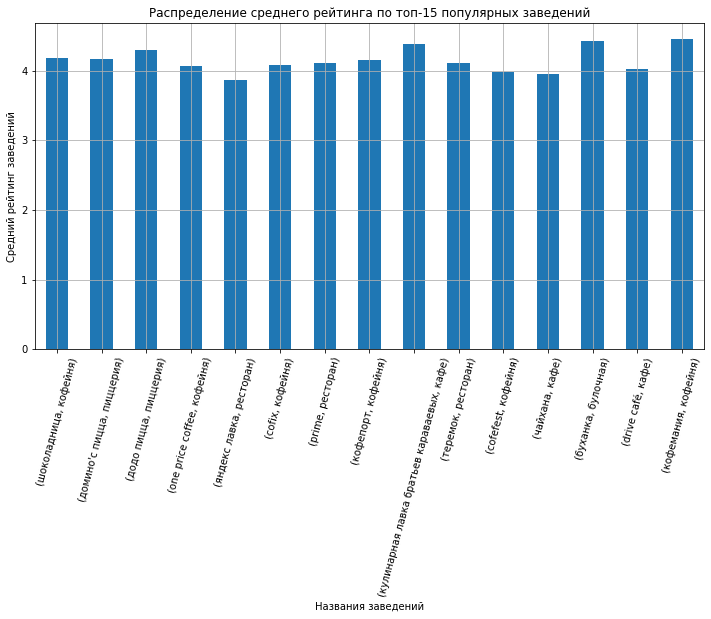

In [50]:
plt.figure(figsize=(12,6))
top_15['rating'].plot(
               kind='bar', 
               rot=75,
               xlabel='Названия заведений',
               ylabel='Средний рейтинг заведений',
               legend=False,
               title='Распределение среднего рейтинга по топ-15 популярных заведений')

plt.grid()

plt.show()

Самый высокий рейтинг в топе-15 у кофейни "Кофемания".  
Также на фоне остальных выделяется "Яндекс Лавка" - её средний рейтинг самый низкий в топе.

---

### Задача 8

Теперь посмотрим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Посмотрим, как удалённость от центра влияет на цены в заведениях.


In [51]:
mb_by_district = round(df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False), 2)
display(mb_by_district)

district
Центральный административный округ         563.12
Западный административный округ            379.16
Северный административный округ            332.74
Северо-Западный административный округ     315.62
Южный административный округ               293.72
Восточный административный округ           267.37
Юго-Западный административный округ        262.70
Северо-Восточный административный округ    242.36
Юго-Восточный административный округ       177.72
Name: middle_avg_bill, dtype: float64

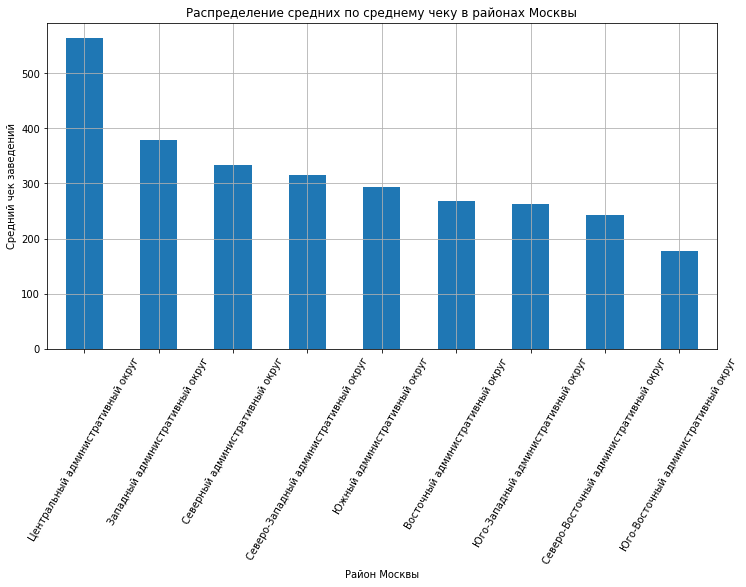

In [52]:
plt.figure(figsize=(12,6))
mb_by_district.plot(
               kind='bar', 
               rot=60,
               xlabel='Район Москвы',
               ylabel='Средний чек заведений',
               legend=False,
               title='Распределение средних по среднему чеку в районах Москвы')

plt.grid()

plt.show()

Заведения в ЦАО в среднем значительно дороже остальных. Север, Запад и Северо-Запад Москвы идут следом. Далее закономерно Юг, Восток и Юго-Запад. А Юго-Восток выделяется как самый дешевый в средних значениях.  
Посмотрим на распределение в отдельных районах Москвы.

---


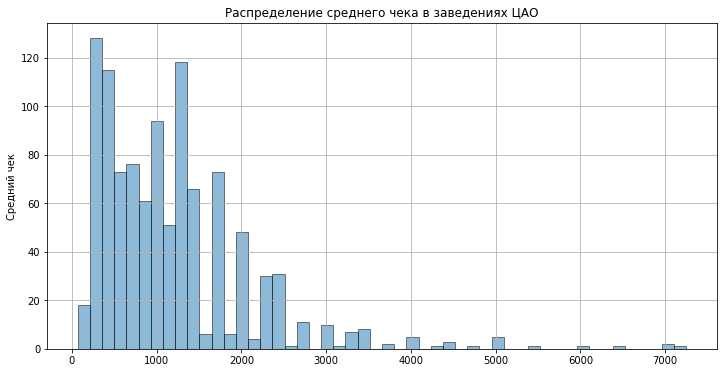

In [53]:
plt.figure(figsize=(12, 6))
#Проводим фильтрацию по району и среднему чеку
df[(df['district']=='Центральный административный округ') & (df['middle_avg_bill'] != 0)]['middle_avg_bill'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.5,
                edgecolor='black',
                rot=0, 
)

plt.title('Распределение среднего чека в заведениях ЦАО')
plt.ylabel('Средний чек')

plt.grid()

plt.show()

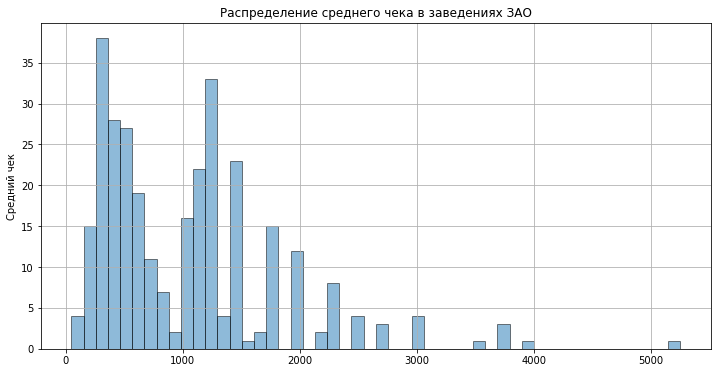

In [54]:
plt.figure(figsize=(12, 6))

df[(df['district']=='Западный административный округ') & (df['middle_avg_bill'] != 0)]['middle_avg_bill'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.5,
                edgecolor='black',
                rot=0, 
)

plt.title('Распределение среднего чека в заведениях ЗАО')
plt.ylabel('Средний чек')

plt.grid()

plt.show()

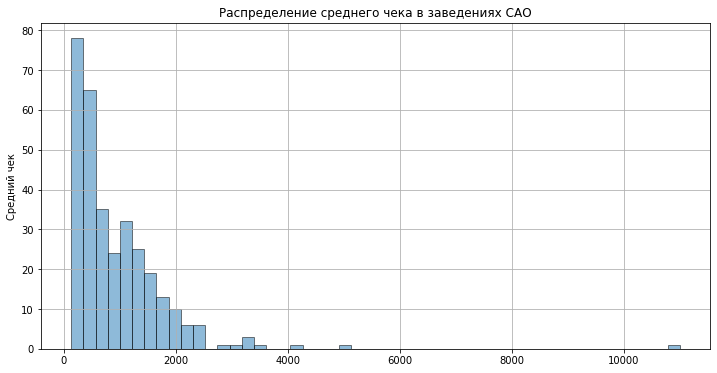

In [55]:
plt.figure(figsize=(12, 6))

df[(df['district']=='Северный административный округ') & (df['middle_avg_bill'] != 0)]['middle_avg_bill'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.5,
                edgecolor='black',
                rot=0, 
)

plt.title('Распределение среднего чека в заведениях САО')
plt.ylabel('Средний чек')

plt.grid()

plt.show()

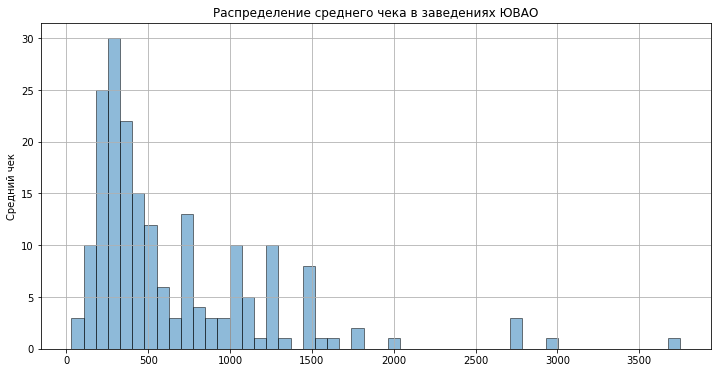

In [56]:
plt.figure(figsize=(12, 6))

df[(df['district']=='Юго-Восточный административный округ') & (df['middle_avg_bill'] != 0)]['middle_avg_bill'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.5,
                edgecolor='black',
                rot=0, 
)

plt.title('Распределение среднего чека в заведениях ЮВАО')
plt.ylabel('Средний чек')

plt.grid()

plt.show()

Распределения показали, что чем меньше средние значения по среднему чеку в разрезе районов, тем более смещенное влево распределение по району, и, как следствие, в распределении по району меньше присутствует значений высокого среднего чека.

---

### Промежуточный вывод
* Наиболее популярная категория заведений - кафе;
* В среднем заведения, расположенные в Центральном автономном округе Москвы, дороже тех, что в других районах;
* Рейтинг заведения частично зависит от категории цен в нем: если цены низкие или выше среднего, то рейтинг зачастую выше, чем в других категориях.

## 4. Итоговый вывод и рекомендации

1. Краткий обзор проделанной работы:
    * Были преобразованы типы данных к релевантным;
    * Заменены пропуски;
    * Удалены дубликаты;
    * Был добавлен столбец `is_24_7`;
    * Были проанализированны данные объединенного датафрейма df;  
      
      
2. Ответы на исследовательские вопросы:
    * Наиболее популярная категория заведений в Москве - "кафе", далее идут "ресторан" и "кофейня";
    * Средний рейтинг у баров/пабов самый высокий - 4.38, однако разброс небольшой - средний рейтинг для всех категорий заведений по Москве в целом не ниже 4 баллов;
    * Сетевых заведений более чем в 1.5 раза меньше, чем не сетевых. Кроме того, в разрезе категорий сетевых булочных, пиццерий и кофеен чуть больше, чем не сетевых. Однако в других категориях сетевых заведений зачастую в полтора и более раз меньше: кафе, рестораны, столовые, бары/пабы;
    * Самый высокий рейтинг среди топ-15 сетевых заведени по кол-ву открытых точек имеет "Кофемания": 4.42;
    * В заведениях, имеющих цены *выше среднего* и *низкими* рейтинг в среднем более высокий, чем в других категориях;
    * Центральный административный округ - наиболее популярный район для открытия заведений, однако также стоит отметить большую конкуренцию в этом районе, как следствие;
    * У большей части заведений в ЦАО средний чек находится в пределах 2000 рублей.  
      
      
3. Рекомендации:
    * Центральный административный округ (ЦАО) остается наиболее популярным районом для открытия заведений, что, вероятно, связано с высокой проходимостью и платежеспособностью аудитории. Однако из-за высокой конкуренции в этом районе стоит рассмотреть альтернативные локации с меньшей насыщенностью заведений, например, Западный автономный округ.
    * Наиболее востребованными категориями являются кафе, рестораны и кофейни. Учитывая популярность этих форматов как среди сетевых, так и несетевых заведений, открытие кафе или кофейни будет наиболее релевантным выбором. При этом кофейни могут быть особенно перспективны благодаря высокому рейтингу сетевых брендов в этой категории (например, "Кофемания").
    * Учитывая данные о среднем чеке в ЦАО (около 2000 рублей) и более высокие рейтинги заведений с ценами *выше среднего*, рекомендуется ориентироваться на ценовой сегмент "выше среднего". Это позволит привлечь платежеспособную аудиторию и повысить лояльность клиентов за счет качественного продукта и сервиса.